<a href="https://colab.research.google.com/github/LinkedInLearning/deep-learning-and-generative-ai-with-python-data-preprocessing-and-analytics-3896069/blob/main/07_03_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Media Channel Sales Using Keras

## Introduction
In this telecom use case, our goal is to build, train, and evaluate a prediction model for media channel sales analysis. To achieve this, we need to follow a few essential steps:


*   Load and inspect the data.
*   Preprocess the data.
*   Perform EDA on the data
*   Input the data into Keras, a user-friendly deep learning framework.

The dataset we'll be using for this challenge is contained in the file marketing_telcom.csv.

# Step 1: Load and Check the Data

Start by loading your data into a pandas DataFrame. Ensure the dataset is loaded correctly by checking its first few rows.

### 1.1 RUN the cell to Import Libraries

In [1]:
# Import the necessary libraries

# For Data loading, Exploratory Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
# Import the train_test_split function from sklearn to split data into training and test sets
from sklearn.model_selection import train_test_split

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error

# Import the StandardScaler class from sklearn to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

#-----------------------------------------------------------------------------------------------------------------
# Build the Network
# Import the TensorFlow library, which is the underlying framework that supports Keras for building and training deep learning models
import tensorflow as tf

# Import the Keras module from TensorFlow, which is a high-level API used for building and training neural networks
from tensorflow import keras

# Import the Sequential class from keras to create a sequential model, which is a linear stack of layers
from keras.models import Sequential

# Import the Input and Dense classes from keras to define the input layer and dense (fully connected) layers of the neural network
from keras.layers import Input, Dense

# Import the EarlyStopping callback from keras to stop training when a monitored metric has stopped improving
from keras.callbacks import EarlyStopping



## 1.2 RUN the cell to load the dataset into a Pandas DataFrame.

In [2]:
# Next, you read the dataset into a Pandas dataframe.

marketing_df = pd.read_csv('/content/marketing_telecom.csv')


# EXERCISE #1



1.   Show the first five rows
2.   Show the last five rows
3.   Show information on the DataFrame
4.   Convert column names to lower case
5.   Replaces spaces in column names with underscores



In [3]:
# Exercise #1 - Show the first five rows

marketing_df.head(10)

,Channel Budget Digital,Channel Budget TV,Channel Budget Radio,Channel Budget Newspaper,sales,Spend Frequency,Start Date,End Date,Duration,ROI,Engagement Metrics,Target Audience Size,Demographics,Zip Code,Seasonality
0,345.15,156.0,37.8,69.2,22.1,Monthly,2023-09-12,2023-11-13,62,2.271417,42,80012,45-54,93225,Summer
1,66.75,46.0,39.3,45.1,10.4,Monthly,2023-10-26,2023-12-06,41,2.124524,461,63669,25-34,91206,Holiday
2,25.80,18.3,45.9,69.3,9.3,Weekly,2023-04-07,2023-05-25,48,2.221942,922,74670,25-34,92627,Winter
3,227.25,145.1,41.3,58.5,18.5,Daily,2023-11-19,2024-02-02,75,1.787010,38,38843,18-24,94553,Holiday
4,271.20,165.2,10.8,58.4,12.9,Weekly,2023-09-28,2023-11-20,53,2.604288,910,71040,55+,93010,Holiday
5,13.05,8.7,48.9,75.0,7.2,Monthly,2023-04-18,2023-07-12,85,2.603351,755,32442,25-34,95345,Holiday
6,86.25,57.5,32.8,23.5,11.8,Monthly,2023-06-17,2023-08-20,64,1.771179,680,58973,25-34,93437,Summer
7,180.30,120.2,19.6,11.6,13.2,Daily,2023-04-05,2023-05-11,36,2.543726,341,31368,55+,94558,Winter
8,12.90,8.6,2.1,1.0,4.8,Monthly,2023-01-26,2023-03-12,45,0.889725,72,34089,25-34,93063,Summer
9,299.70,199.8,2.6,21.2,10.6,Weekly,2023-12-05,2024-01-24,50,1.136432,522,68630,55+,95681,Summer


In [4]:
# Exercise #1 - Show the last five rows

marketing_df.tail(10)

,Channel Budget Digital,Channel Budget TV,Channel Budget Radio,Channel Budget Newspaper,sales,Spend Frequency,Start Date,End Date,Duration,ROI,Engagement Metrics,Target Audience Size,Demographics,Zip Code,Seasonality
1189,5.8,18.7,12.1,23.4,6.7,Weekly,2023-02-15,2023-04-08,52,1.030146,716,77655,25-34,93932,Summer
1190,6.0,39.5,41.1,5.8,10.8,Weekly,2023-06-12,2023-08-29,78,0.579944,287,43587,25-34,90746,Holiday
1191,31.6,75.5,10.8,6.0,9.9,Daily,2023-06-24,2023-07-31,37,0.805835,129,41053,55+,93001,Holiday
1192,3.6,17.2,4.1,31.6,5.9,Daily,2023-05-28,2023-07-17,50,0.644699,61,45233,55+,91773,Summer
1193,6.0,166.8,42.0,3.6,19.6,Weekly,2023-03-21,2023-05-19,59,0.594316,663,40999,25-34,92649,NaN
1194,13.8,149.7,35.6,6.0,17.3,Monthly,2023-02-17,2023-04-10,52,1.405795,8,24540,35-44,91202,Winter
1195,8.1,38.2,3.7,13.8,7.6,Daily,2023-07-21,2023-09-20,61,1.880501,323,86393,25-34,95637,Holiday
1196,6.4,94.2,4.9,8.1,9.7,Weekly,2023-11-24,2024-01-20,57,2.788503,450,33719,18-24,96048,Winter
1197,8.1,38.2,3.7,13.8,7.6,Weekly,2023-11-15,2024-01-13,59,1.214525,399,60107,55+,92503,Summer
1198,6.4,94.2,4.9,8.1,9.7,Weekly,2023-04-06,2023-06-07,62,2.001879,354,68307,25-34,93962,Winter


In [5]:
# Exercise #1 - Show information on the DataFrame

marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Channel Budget Digital    1199 non-null   float64
 1   Channel Budget TV         1199 non-null   float64
 2   Channel Budget Radio      1199 non-null   float64
 3   Channel Budget Newspaper  1199 non-null   float64
 4   sales                     1199 non-null   float64
 5   Spend Frequency           1199 non-null   object 
 6   Start Date                1199 non-null   object 
 7   End Date                  1199 non-null   object 
 8   Duration                  1199 non-null   int64  
 9   ROI                       1199 non-null   float64
 10  Engagement Metrics        1199 non-null   int64  
 11  Target Audience Size      1199 non-null   int64  
 12  Demographics              1199 non-null   object 
 13  Zip Code                  1199 non-null   int64  
 14  Seasonal

NOTE: When to Convert Column Names to Lowercase

You should convert column names to lowercase as one of the first steps in your data preprocessing workflow. Some systems and tools assume lowercase by default, so using lowercase can help avoid issues when integrating with other software.

This should be done right after loading the dataset, ensuring that all subsequent operations use the standardized column names.

In [6]:
# Exercise #1 - Convert all column names to lowercase
marketing_df.columns = marketing_df.columns.str.lower()

In [7]:

# Exercise #1 Replace Spaces with Underscores
marketing_df.columns = marketing_df.columns.str.replace(' ', '_')


In [8]:
marketing_df.head()

,channel_budget_digital,channel_budget_tv,channel_budget_radio,channel_budget_newspaper,sales,spend_frequency,start_date,end_date,duration,roi,engagement_metrics,target_audience_size,demographics,zip_code,seasonality
0,345.15,156.0,37.8,69.2,22.1,Monthly,2023-09-12,2023-11-13,62,2.271417,42,80012,45-54,93225,Summer
1,66.75,46.0,39.3,45.1,10.4,Monthly,2023-10-26,2023-12-06,41,2.124524,461,63669,25-34,91206,Holiday
2,25.80,18.3,45.9,69.3,9.3,Weekly,2023-04-07,2023-05-25,48,2.221942,922,74670,25-34,92627,Winter
3,227.25,145.1,41.3,58.5,18.5,Daily,2023-11-19,2024-02-02,75,1.787010,38,38843,18-24,94553,Holiday
4,271.20,165.2,10.8,58.4,12.9,Weekly,2023-09-28,2023-11-20,53,2.604288,910,71040,55+,93010,Holiday


In [9]:
# Pandas info() function is used to get a concise summary of the dataframe.
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   channel_budget_digital    1199 non-null   float64
 1   channel_budget_tv         1199 non-null   float64
 2   channel_budget_radio      1199 non-null   float64
 3   channel_budget_newspaper  1199 non-null   float64
 4   sales                     1199 non-null   float64
 5   spend_frequency           1199 non-null   object 
 6   start_date                1199 non-null   object 
 7   end_date                  1199 non-null   object 
 8   duration                  1199 non-null   int64  
 9   roi                       1199 non-null   float64
 10  engagement_metrics        1199 non-null   int64  
 11  target_audience_size      1199 non-null   int64  
 12  demographics              1199 non-null   object 
 13  zip_code                  1199 non-null   int64  
 14  seasonal

In [10]:
### Get summary of statistics of the data
marketing_df.describe()

,channel_budget_digital,channel_budget_tv,channel_budget_radio,channel_budget_newspaper,sales,duration,roi,engagement_metrics,target_audience_size,zip_code
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505,59.481234,1.748367,491.065888,54926.087573,93513.145121
std,135.730821,85.61047,14.820827,21.712507,5.202804,16.845793,0.731189,288.849725,26259.953527,1847.354920
min,0.300000,0.70000,0.000000,0.300000,1.600000,30.000000,0.502511,0.000000,10044.000000,90001.000000
25%,24.250000,73.40000,9.950000,12.800000,10.300000,46.000000,1.097243,238.500000,31911.000000,92112.000000
50%,64.650000,149.70000,22.500000,25.600000,12.900000,59.000000,1.738124,498.000000,54621.000000,93561.000000
75%,256.950000,218.50000,36.500000,45.100000,17.400000,74.000000,2.421896,736.000000,78036.500000,95324.500000
max,444.600000,296.40000,49.600000,114.000000,27.000000,89.000000,2.999729,999.000000,99679.000000,96148.000000


In [11]:
#shape of dataframe - 1199 rows, five columns
marketing_df.shape

(1199, 15)

# EXERCISE #2

1. Visualize the missing values
2. Fill the missing value
3. Handle data type inconsistency

# EXERCISE #3

1. Plot the loss curves after the model has completed training.
2. Copy the loss curve image into an AI Chatbot.

# Step 2: Preprocess the Data

### 2.1 Handle Missing Values

Since the seasonality column has missing values, decide whether to fill them (imputation) or drop them.

<Axes: >

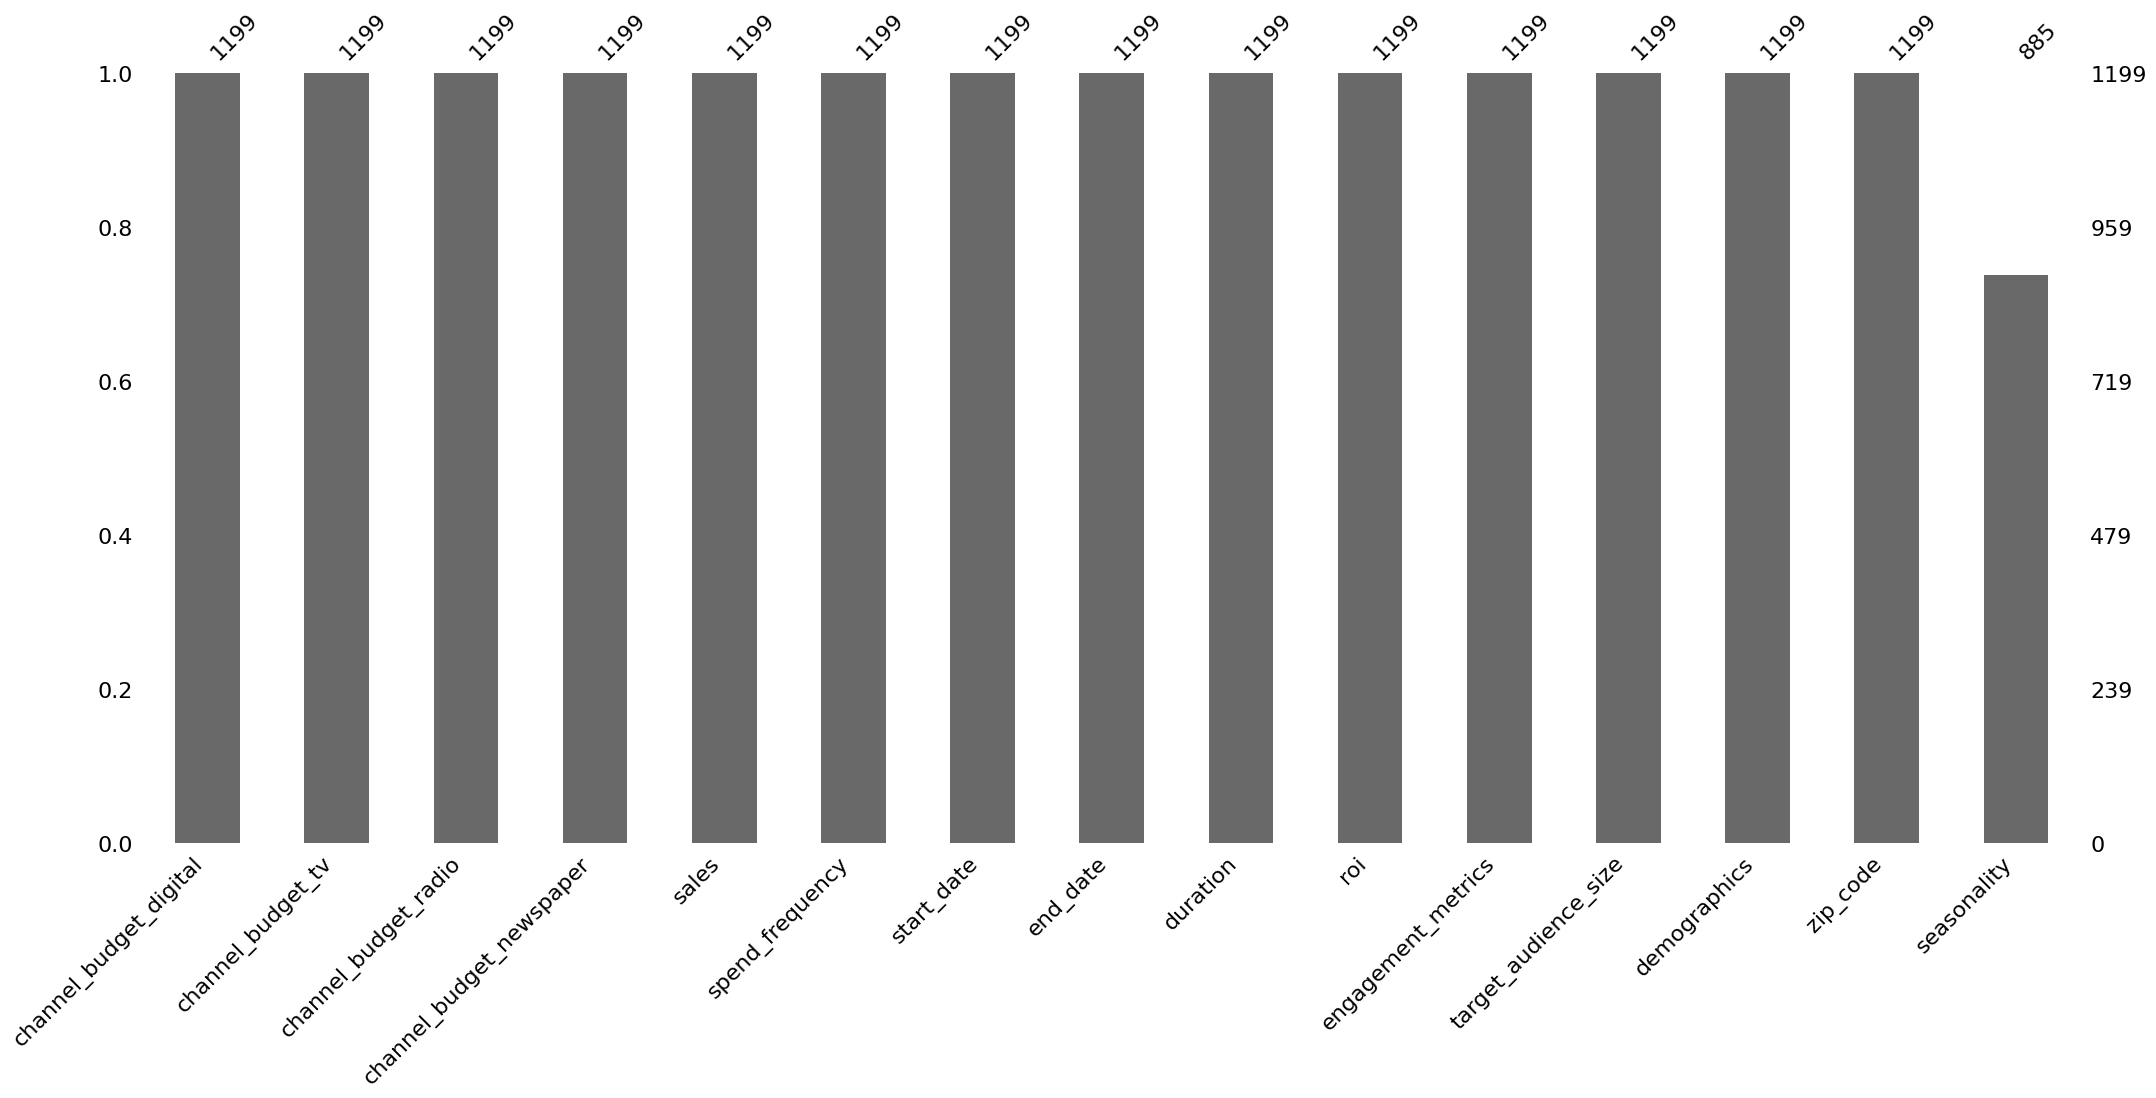

In [12]:
# Add the msno library to visualize the missing values

import missingno as msno

msno.bar(marketing_df)

Option 1: Fill missing values with a placeholder value such as 'Unknown'
Option 2: Drop rows with missing values (if acceptable)


<Axes: >

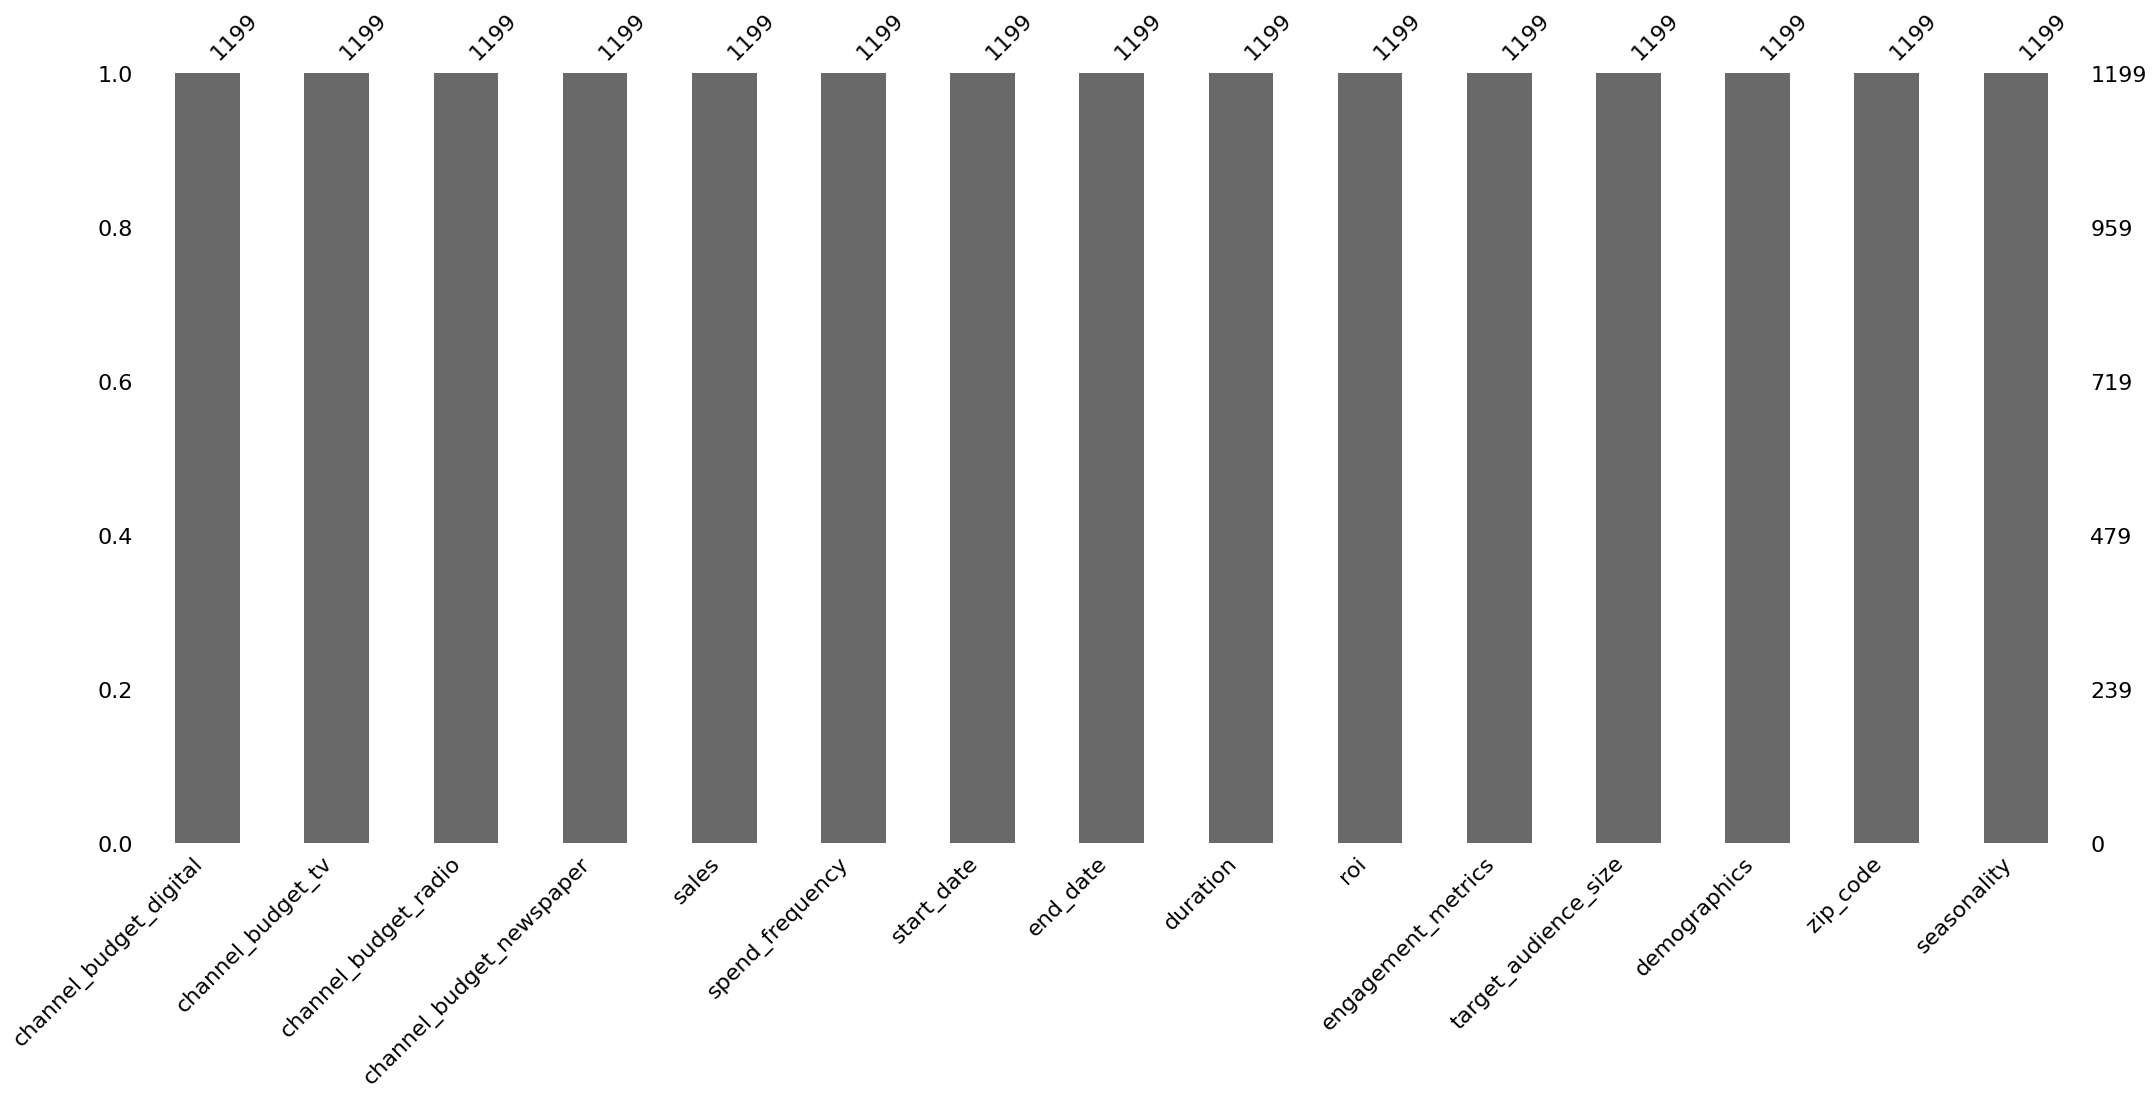

In [13]:
# Option 1: Fill missing values with a placeholder value such as 'Unknown'
marketing_df['seasonality'].fillna('Unknown', inplace=True)

# Option 2: Drop rows with missing values (if acceptable)
# data.dropna(subset=['seasonality'], inplace=True)

msno.bar(marketing_df)


## 2.2 Convert Date Columns

Convert start date and end date from string to datetime objects to facilitate time-based analysis.

In [14]:
marketing_df['start_date'] = pd.to_datetime(marketing_df['start_date'])
marketing_df['end_date'] = pd.to_datetime(marketing_df['end_date'])


## 2.3 Encode Categorical Variables

For categorical variables like spend frequency, demographics, and seasonality, consider encoding them if you plan to use them in model training.

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical variables
marketing_df['spend_frequency'] = le.fit_transform(marketing_df['spend_frequency'])
marketing_df['demographics'] = le.fit_transform(marketing_df['demographics'])
marketing_df['seasonality'] = le.fit_transform(marketing_df['seasonality'])

marketing_df.head()

,channel_budget_digital,channel_budget_tv,channel_budget_radio,channel_budget_newspaper,sales,spend_frequency,start_date,end_date,duration,roi,engagement_metrics,target_audience_size,demographics,zip_code,seasonality
0,345.15,156.0,37.8,69.2,22.1,1,2023-09-12,2023-11-13,62,2.271417,42,80012,3,93225,1
1,66.75,46.0,39.3,45.1,10.4,1,2023-10-26,2023-12-06,41,2.124524,461,63669,1,91206,0
2,25.80,18.3,45.9,69.3,9.3,2,2023-04-07,2023-05-25,48,2.221942,922,74670,1,92627,3
3,227.25,145.1,41.3,58.5,18.5,0,2023-11-19,2024-02-02,75,1.787010,38,38843,0,94553,0
4,271.20,165.2,10.8,58.4,12.9,2,2023-09-28,2023-11-20,53,2.604288,910,71040,4,93010,0


## 2.4 Handle Data Inconsistency

Zip Code is an integer!

In [16]:
# Enter the code to convert the 'zip_code" column to an object (string)

marketing_df['zip_code'] = marketing_df['zip_code'].astype(str)

# Enter the code to check the data type of the zip code column

print(marketing_df['zip_code'].dtype)

object


In [17]:
marketing_df.corr()

,channel_budget_digital,channel_budget_tv,channel_budget_radio,channel_budget_newspaper,sales,spend_frequency,start_date,end_date,duration,roi,engagement_metrics,target_audience_size,demographics,zip_code,seasonality
channel_budget_digital,1.000000,0.474256,0.041316,0.048023,0.380101,-0.030208,0.017319,0.022551,0.035545,0.038975,0.012024,0.029220,0.012193,0.049379,-0.030569
channel_budget_tv,0.474256,1.000000,0.055697,0.055579,0.781824,0.004226,-0.001072,-0.002803,-0.011302,0.033637,-0.014125,0.041246,0.023450,0.040280,-0.014554
channel_budget_radio,0.041316,0.055697,1.000000,0.353096,0.576528,-0.003998,-0.030084,-0.022820,0.043987,0.009932,0.011579,-0.001576,-0.032382,-0.009883,0.026908
channel_budget_newspaper,0.048023,0.055579,0.353096,1.000000,0.227039,0.027376,0.026086,0.030055,0.028241,-0.006204,0.008906,-0.044861,0.010637,-0.018959,0.032868
sales,0.380101,0.781824,0.576528,0.227039,1.000000,0.003848,-0.031635,-0.029320,0.011831,0.048925,-0.004064,0.045859,0.007501,0.025078,-0.008104
spend_frequency,-0.030208,0.004226,-0.003998,0.027376,0.003848,1.000000,0.011275,0.010739,-0.002346,-0.003050,-0.033797,-0.024826,-0.006688,-0.027247,0.001107
start_date,0.017319,-0.001072,-0.030084,0.026086,-0.031635,0.011275,1.000000,0.987972,0.021283,0.000723,0.012422,-0.026464,0.024769,-0.032098,0.011423
end_date,0.022551,-0.002803,-0.022820,0.030055,-0.029320,0.010739,0.987972,1.000000,0.175624,-0.000599,0.011446,-0.022635,0.023501,-0.025488,0.014058
duration,0.035545,-0.011302,0.043987,0.028241,0.011831,-0.002346,0.021283,0.175624,1.000000,-0.008476,-0.005079,0.022135,-0.005743,0.039556,0.018166
roi,0.038975,0.033637,0.009932,-0.006204,0.048925,-0.003050,0.000723,-0.000599,-0.008476,1.000000,0.021959,0.041146,-0.002848,-0.024306,-0.019032


## 2.5 Check for Outliers

Recall that by visualizing the distributions and using these plots, you can identify outliers and better understand the characteristics of each feature in your dataset.

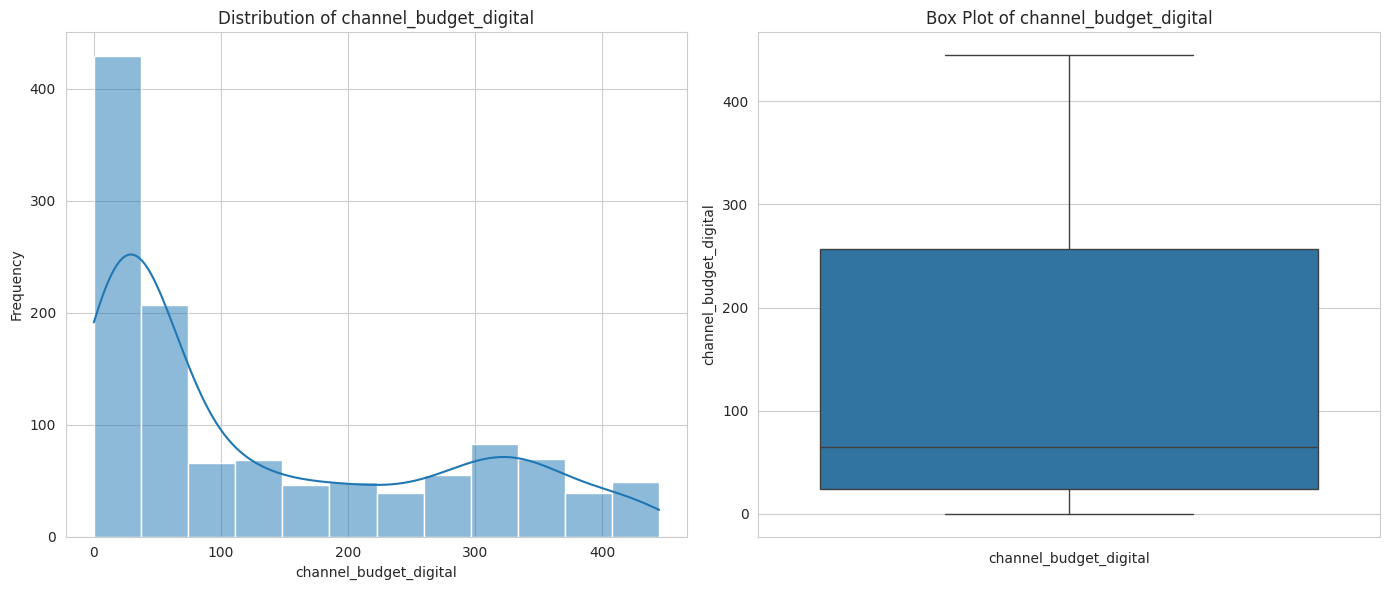

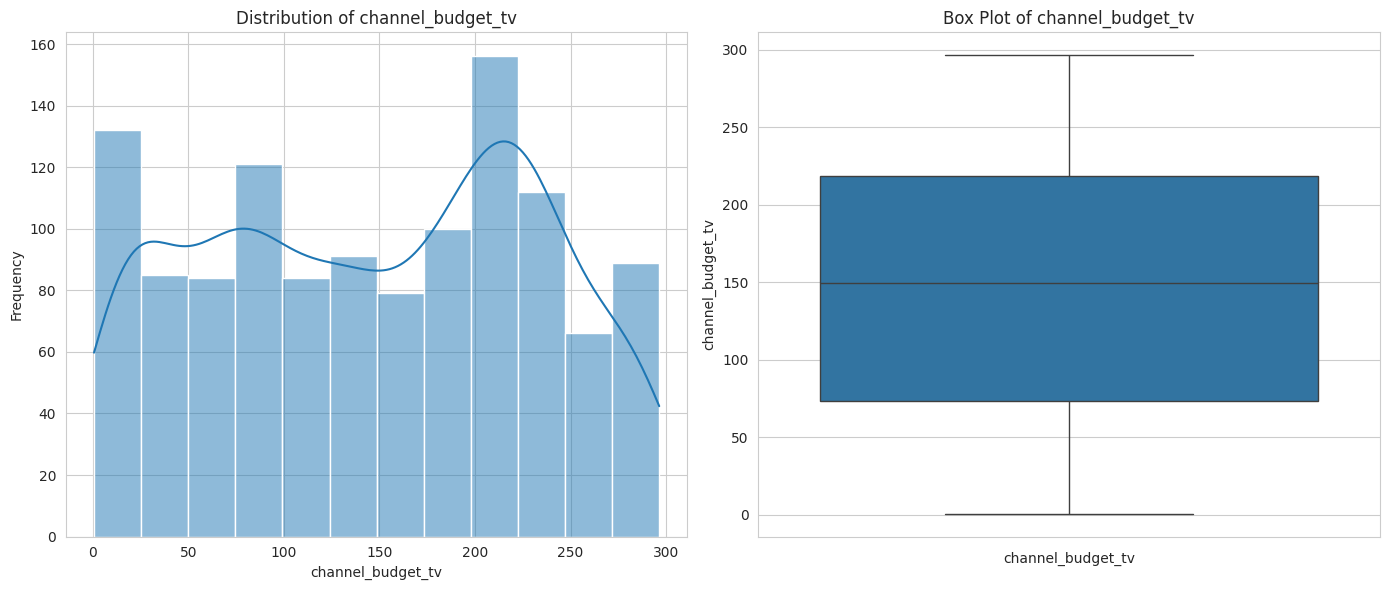

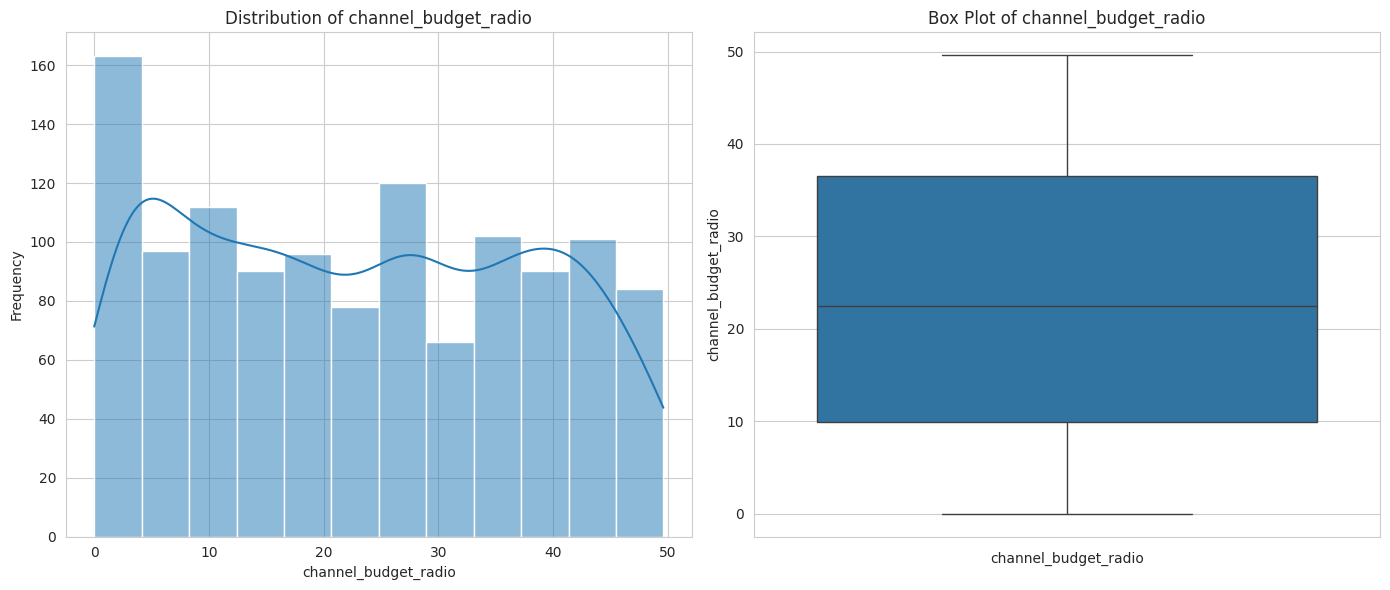

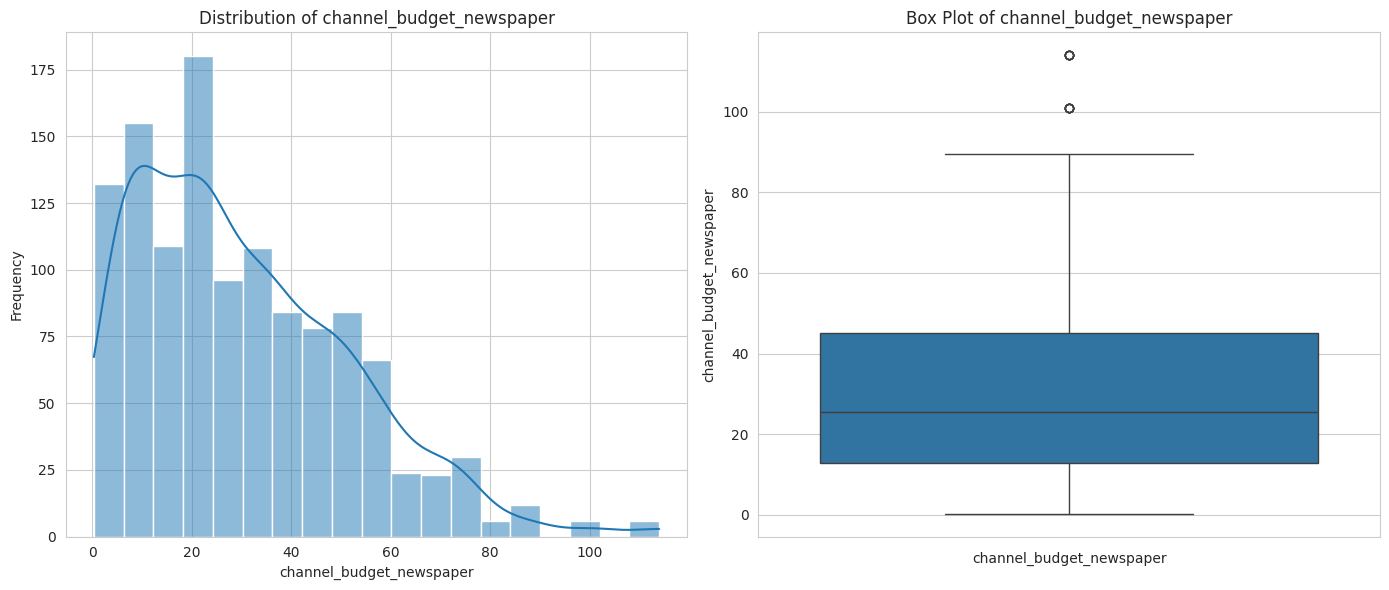

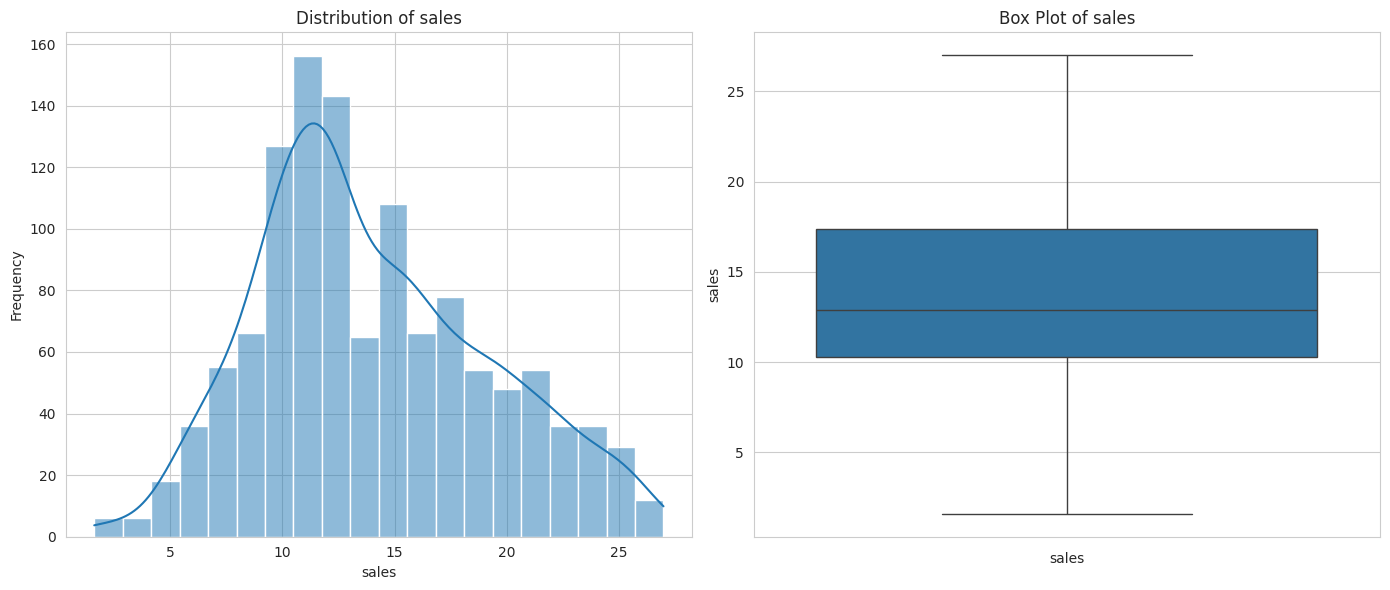

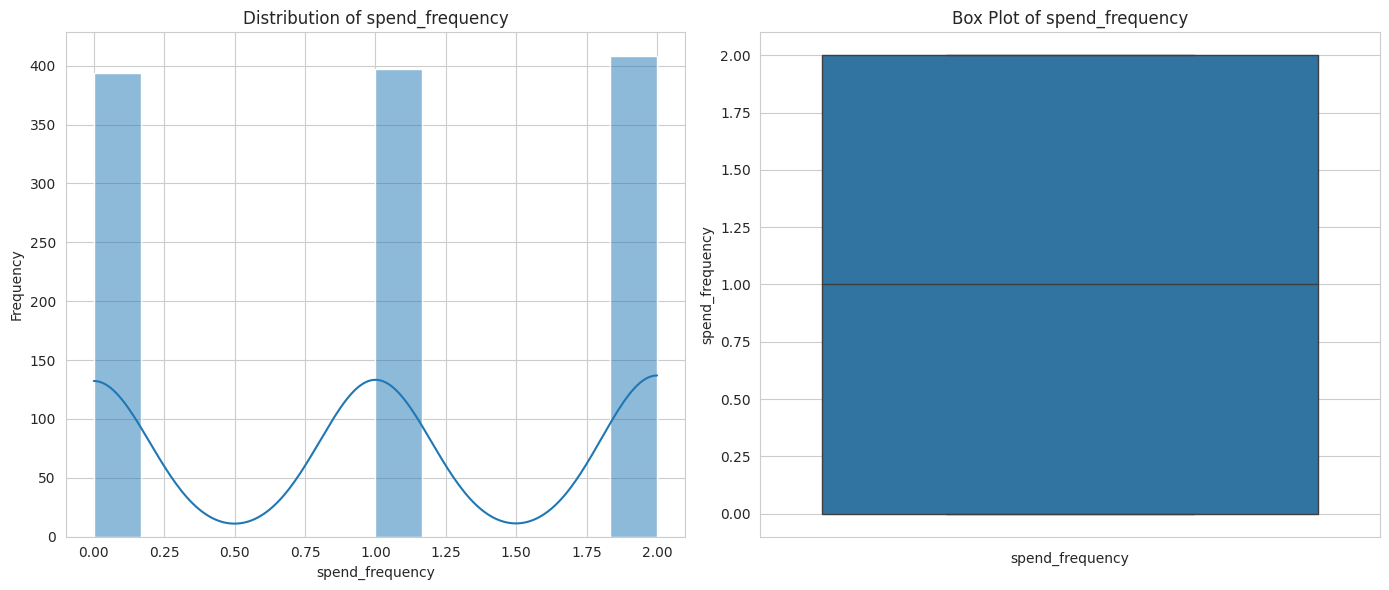

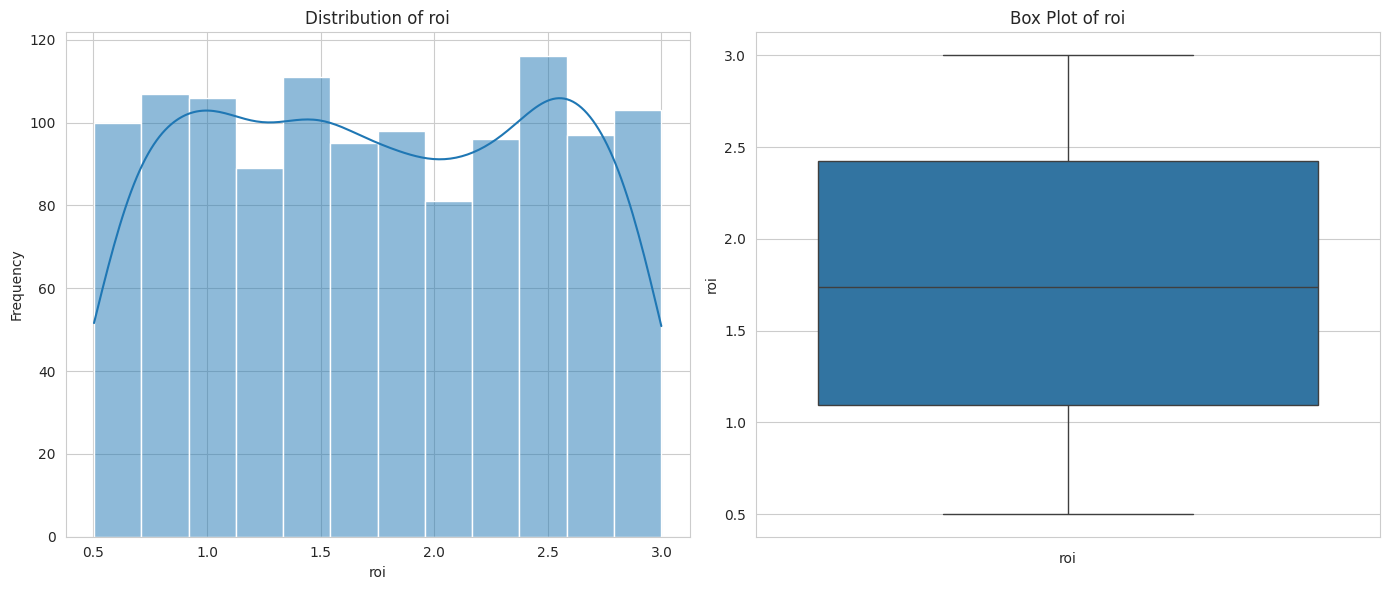

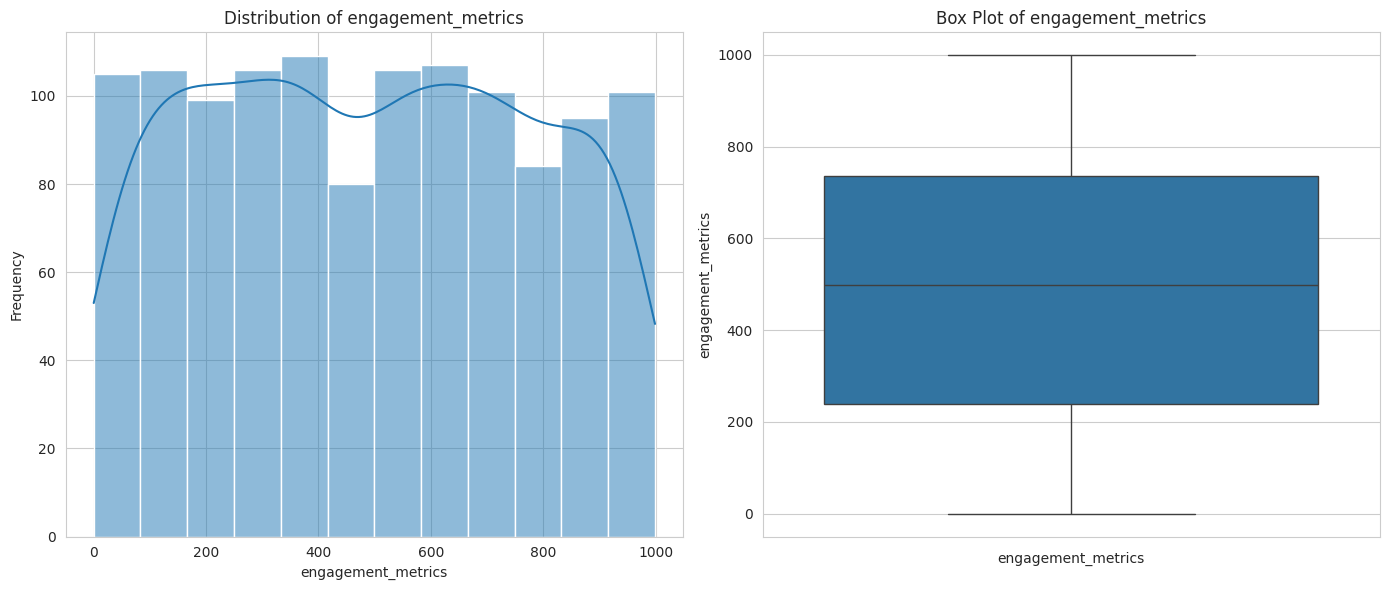

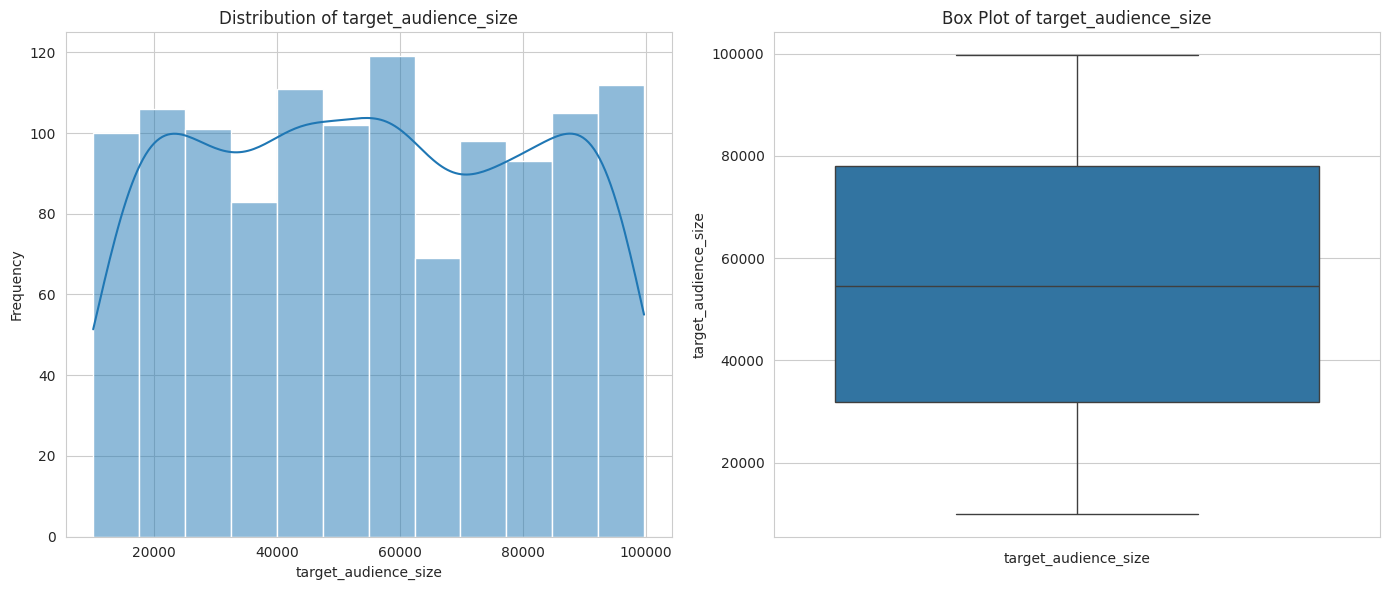

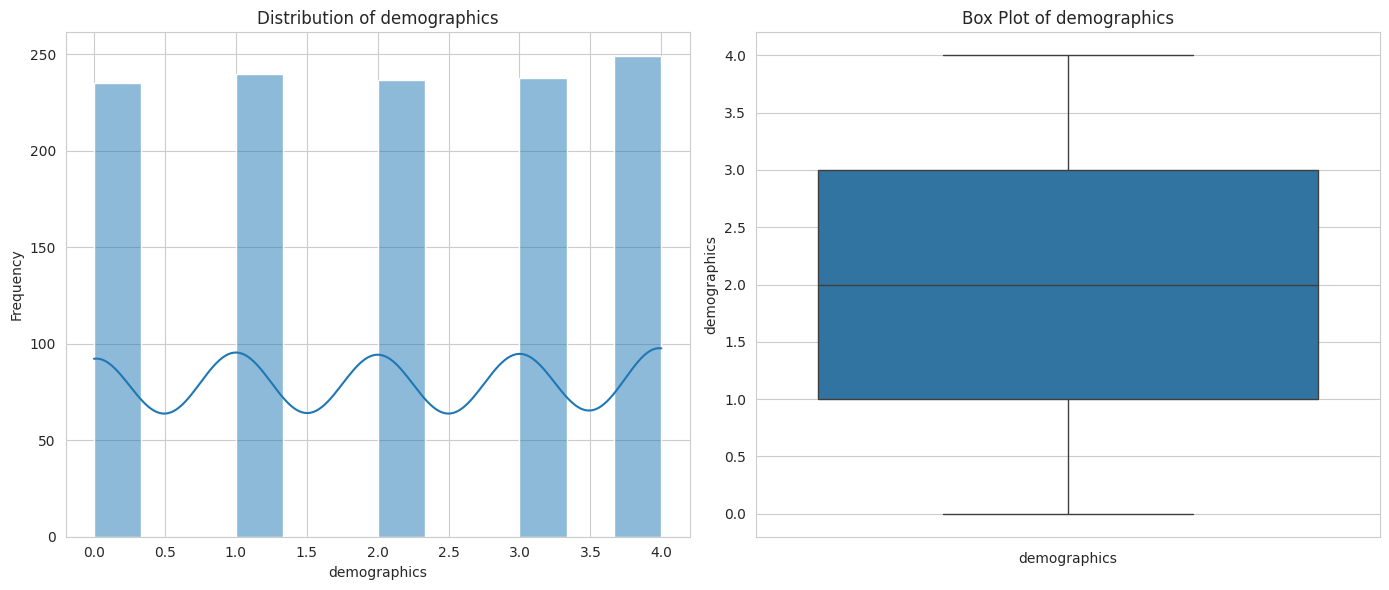

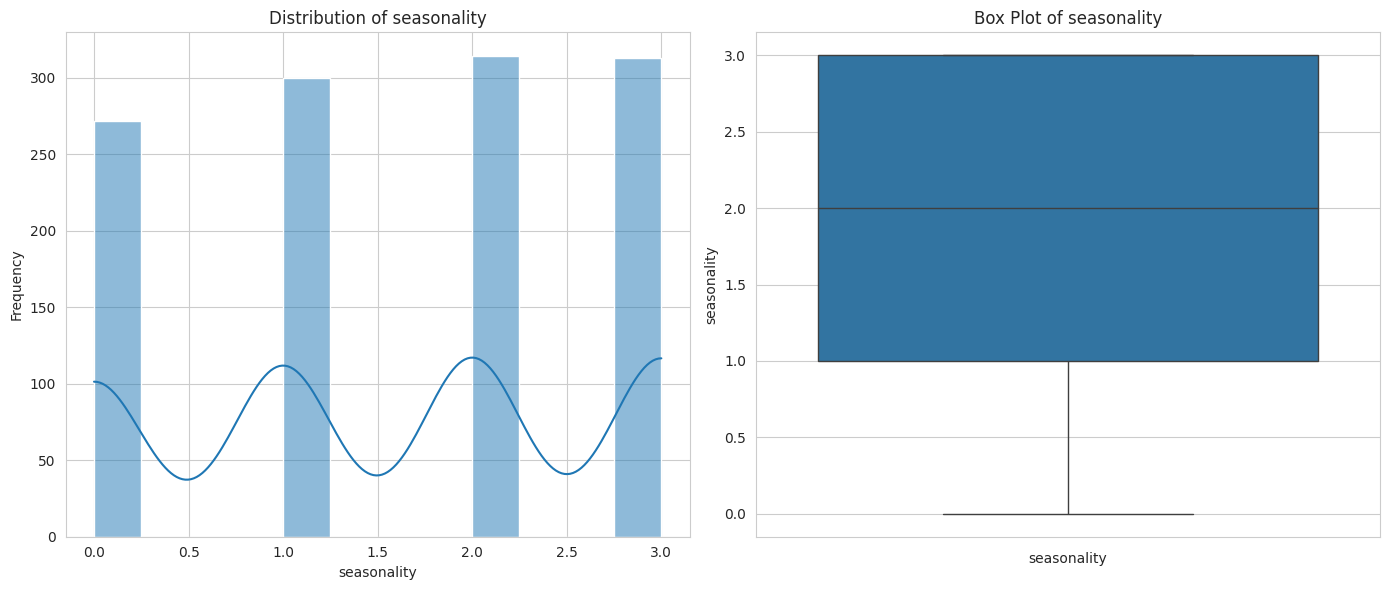

In [18]:
# List of columns to visualize
columns_to_visualize = [
    'channel_budget_digital', 'channel_budget_tv', 'channel_budget_radio',
    'channel_budget_newspaper', 'sales', 'spend_frequency', 'roi',
    'engagement_metrics', 'target_audience_size', 'demographics', 'seasonality'
]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms and box plots for each feature
for column in columns_to_visualize:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(marketing_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=marketing_df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

## Use an AI Chatbot to Interpret Results of the Check for Outliers.



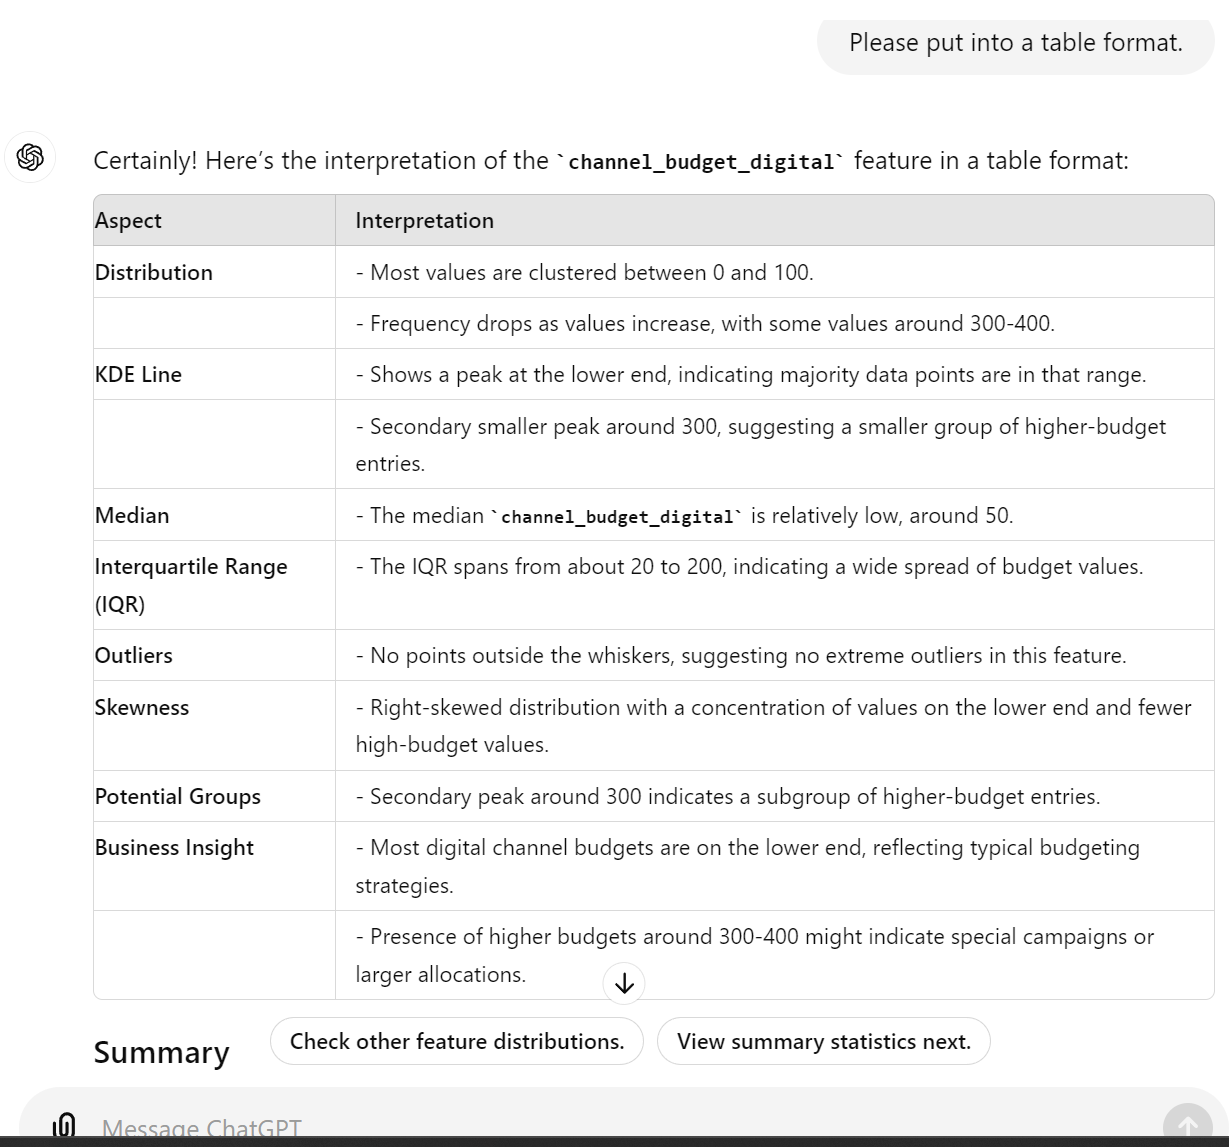

# Step 3: Exploratory Data Analysis



## 3.1 Correlation Matrix

Visualize the correlation between numerical features to understand their relationships.

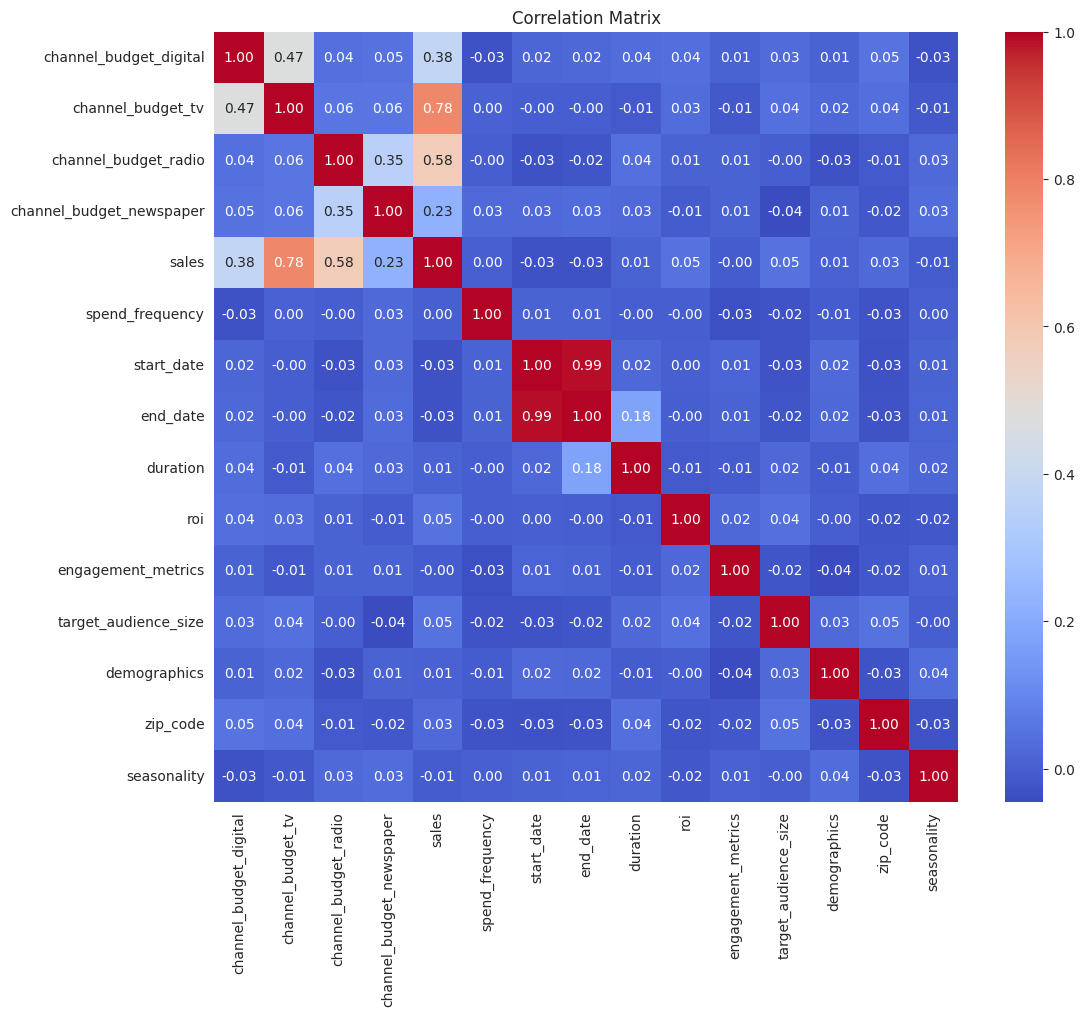

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = marketing_df.corr()

# Use seaborn to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## 3.2 Distribution of Sales and ROI

Examine the distributions of sales and ROI.

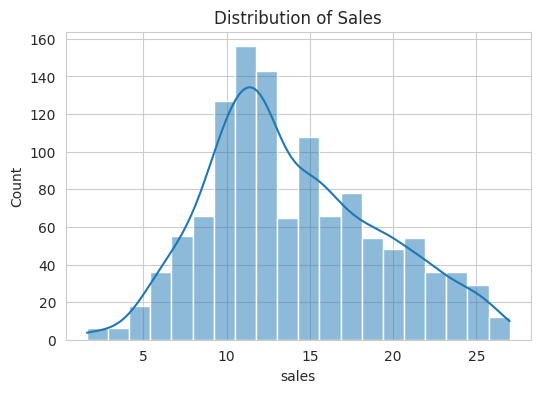

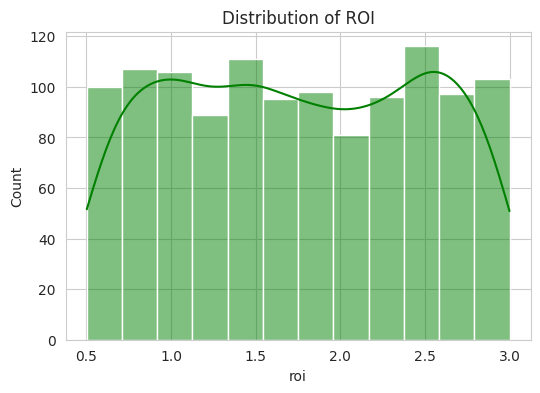

In [20]:
# Histogram of Sales
plt.figure(figsize=(6, 4))
sns.histplot(marketing_df['sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

# Histogram of ROI
plt.figure(figsize=(6, 4))
sns.histplot(marketing_df['roi'], kde=True, color='green')
plt.title('Distribution of ROI')
plt.show()


## 3.2 Budget Allocation Across Channels

Compare how budget is allocated across different channels.

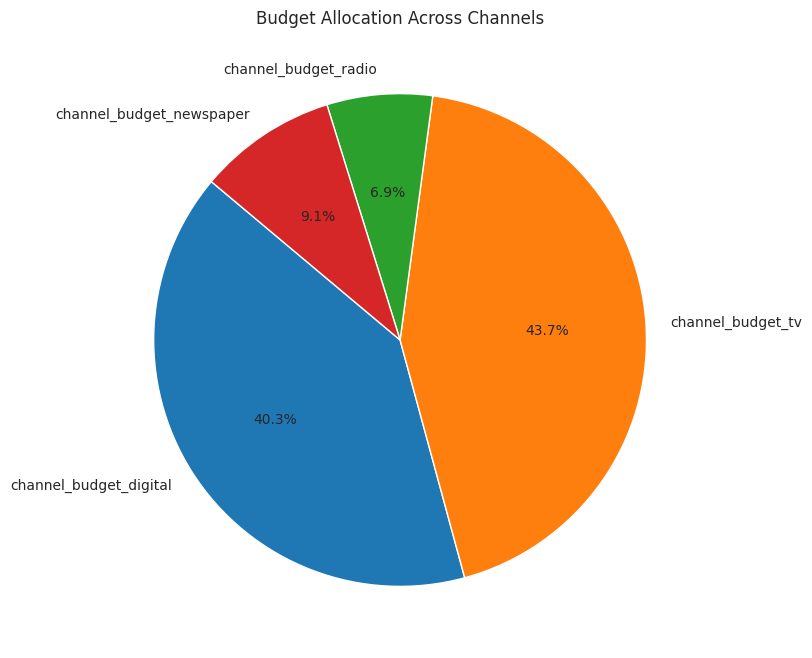

In [21]:
# Pie chart for budget allocation
budget_columns = ['channel_budget_digital', 'channel_budget_tv', 'channel_budget_radio', 'channel_budget_newspaper']
budget_totals = marketing_df[budget_columns].sum()

plt.figure(figsize=(8, 8))
plt.pie(budget_totals, labels=budget_columns, autopct='%1.1f%%', startangle=140)
plt.title('Budget Allocation Across Channels')
plt.show()


# Step 4: Save the Processed Data

Finally, save your processed dataset for further analysis or model training.

In [22]:
marketing_df.to_csv('/content/clean_marketing.csv', index=False)


## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression.

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

#### Data Preprocessing

##### Split: X (features) and y (target)
Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [23]:
X = marketing_df[['channel_budget_digital', 'channel_budget_tv', 'channel_budget_radio', 'channel_budget_newspaper']]
y = marketing_df['sales']



##### Scaling (Normalization)

In [24]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)



##### Train - Test - Split

Now let's split the data into a training and test set.  Note:  Best practices is to split into three - training, validation, and test set.

By default - It splits the given data into 75-25 ratio


In [25]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [26]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Step 5:  Build Network


#### Build and Train the Network

In [27]:
# Build Model (Building a three-layer network - with one hidden layer)
# Assuming X_train is already defined and its shape is known
input_shape = X_train.shape[1]

# Build the model
model = Sequential()
model.add(Input(shape=(input_shape,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Predict CLV
y_pred = model.predict(X_test)








Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 91.8929 - val_loss: 19.4543
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.3644 - val_loss: 5.9345
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5208 - val_loss: 3.4174
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2969 - val_loss: 3.5718
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3292 - val_loss: 3.2374
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1666 - val_loss: 2.8860
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9387 - val_loss: 2.7506
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0321 - val_loss: 2.7148
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0964 - val_loss: 2.6528
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8661 - val_loss: 2.6782
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.5846 - val_loss: 2.4694
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss

# EXERCISE #3 - HERE

Plot the loss curves after the model has completed training.
Copy the loss curve image into an AI Chatbot.

### Visualize the Model Performance

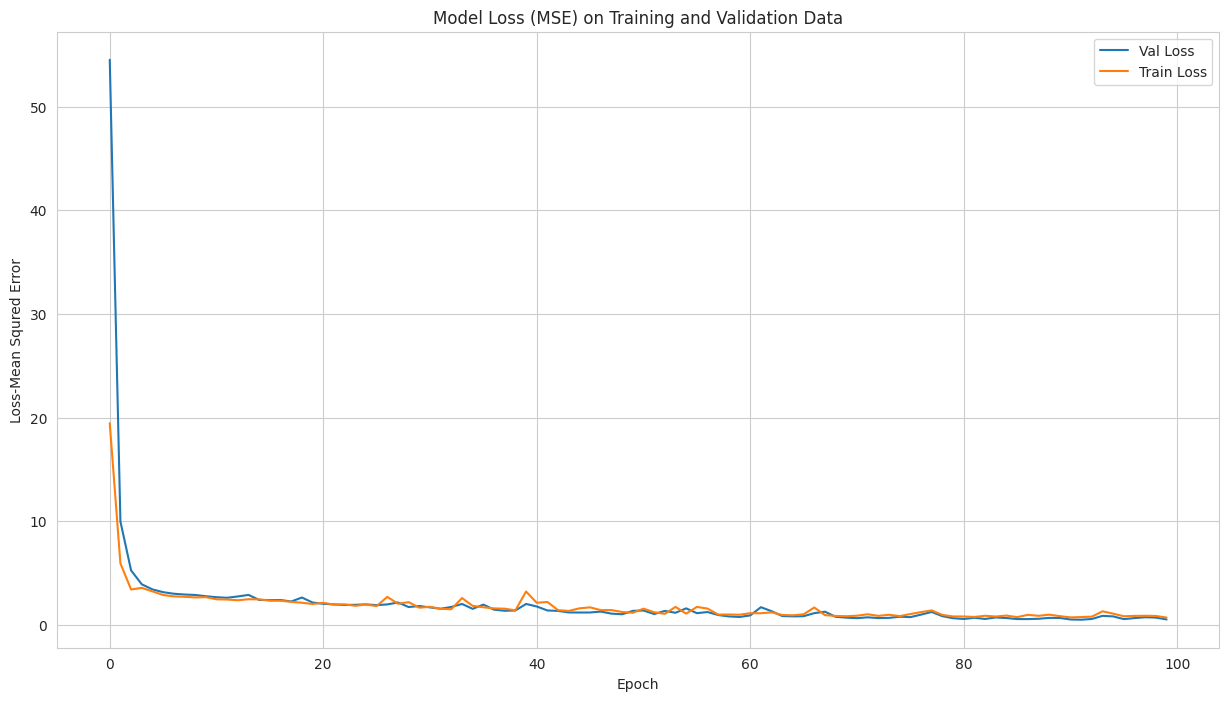

In [28]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

## Predict Sales

In [29]:
'''=== predict the SALES =='''

# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[24.610844  19.227194  13.680274  20.264011  17.645075  23.836359
  9.477981  22.280724  19.144194  14.452945   7.5712504 16.012753
  5.702148   8.986105   7.489635   6.0927687 20.168987  14.812742
  6.6823254 18.24023   24.034975   8.3955765 11.616891  11.53946
  8.015702   4.4715204 16.28974   14.403991  10.79976    9.520884
 14.48046   17.325964  19.799343  12.682161  16.497105   6.851199
 24.380165  14.348732  10.662379  16.697025  12.9342985 15.68711
  8.918914  14.7280245 16.411583  16.171427   7.623616  24.380165
 13.486465  11.042975   8.990682   7.489635  12.092666  16.216198
  5.9368405 17.791832  16.116241  22.251875  10.677126  11.89248
 11.449391  10.708991  10.20535   12.583924   9.121998   9.134359
  9.468844  21.986942   7.427731  20.339722   7.3361983 25.16634
  8.878396  19.918694  12.172832  15.502627  16.89185   12.774493
 17.325966  19.93124   18.035803  19.357697  17.442509  17.90414
 14.461632  17.983866   9.812331   7.6430

Copy the above output and paste into an AI Chatbot. Our results are shown below.

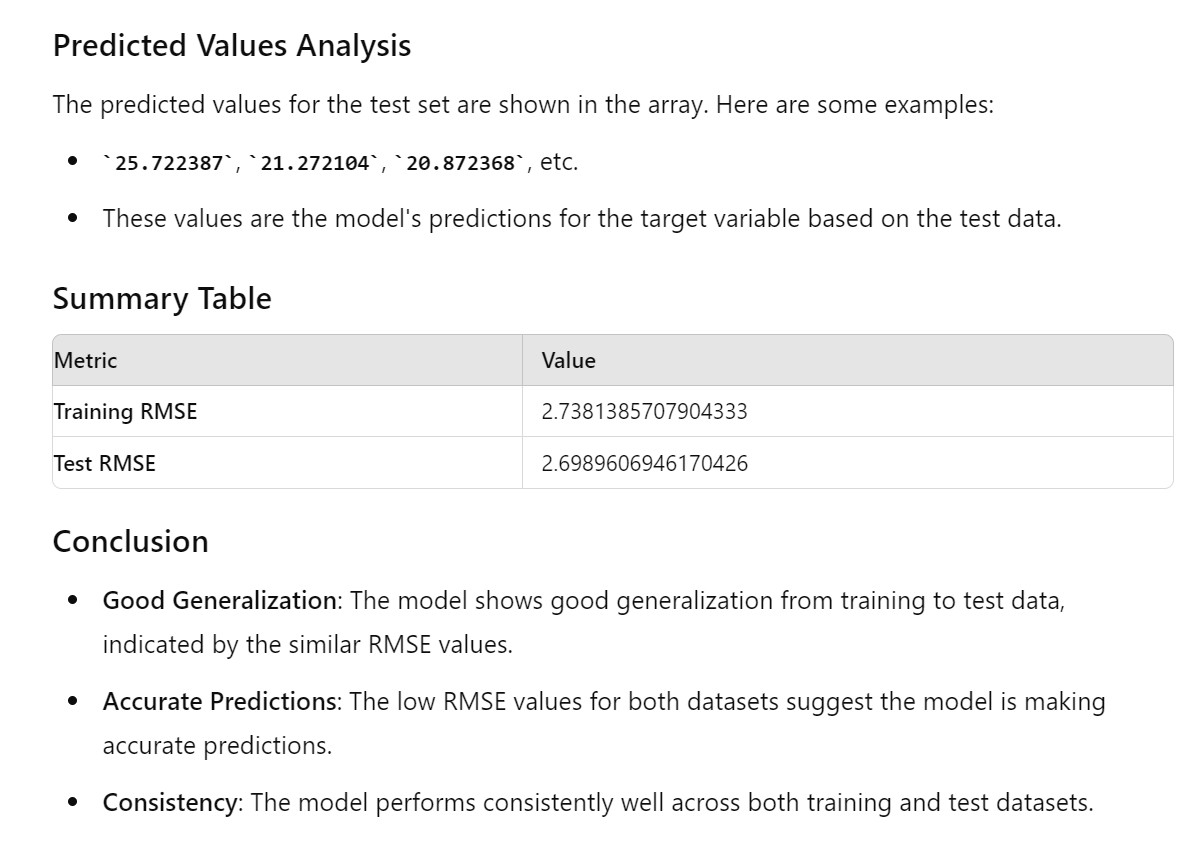

In [30]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(6) # Show first six rows

,True Value,Predicted Value
0,26.2,24.610844
1,19.0,19.227194
2,12.8,13.680274
3,20.8,20.264011
4,16.9,17.645075
5,23.8,23.836359


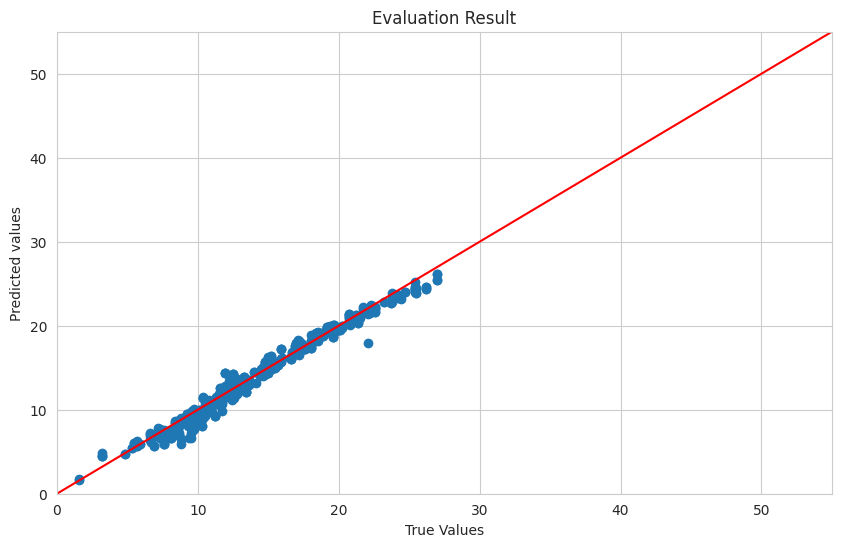

In [31]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

Show the accuracy of Linear Regression on the dataset. The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best-fit line.

<Axes: xlabel='sales'>

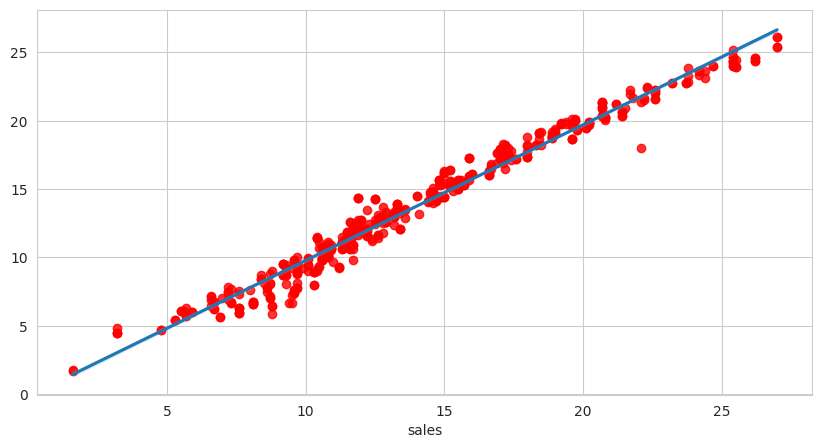

In [32]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

In [33]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.7219771877711404
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.8640008441134371


Good Generalization: The model shows good generalization from training to test data, as indicated by the similar RMSE values.
Accurate Predictions: The low RMSE values for both datasets suggest that the model is making accurate predictions.

# CONGRATULATIONS! May your learning journey continue!
